# Lab: Trees

Lab associated with Module: Trees

***

In [1796]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

C:\Users\KasparLazar\AppData\Local\Temp\ipykernel_16364\1945220536.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


***

### Section 0: Imports

In [1797]:
import numpy as np

Following libraries have to be installed on your computer. Try to install graphviz by using: conda install python-graphviz

I made use of some of the following links to get rid of errors:
    
https://github.com/quadram-institute-bioscience/albatradis/issues/7

https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft

https://github.com/xflr6/graphviz/issues/68

https://github.com/RedaOps/ann-visualizer/issues/12


On my mac computer I had to install some packages using brew to get rid of following error: "ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH"

brew install graphviz

In [1798]:
from IPython.display import Image
from graphviz import Digraph

Details of Digraph package: https://h1ros.github.io/posts/introduction-to-graphviz-in-jupyter-notebook/

***

### Section 1: Testing Visualization Package

Let us test this visualization Digraph Pacakge, it is only a tool for displaying tree or graph, this will come handy as it helps to visualize our solution.

In [1799]:
dot = Digraph()

dot.node("1")
dot.node("2")
dot.edges(['12'])

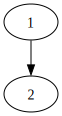

In [1800]:
dot

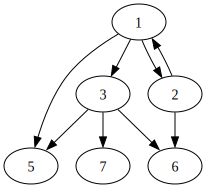

In [1801]:
# Create Digraph object
dot = Digraph()

# Add nodes
dot.node('1')
dot.node('3')
dot.node('2')
dot.node('5')
dot.node('6')
dot.node('7')

# Add edges
dot.edges(['12', '13', '35', '15', '21', '37', '36', '26'])

# Visualize the graph
dot

***

### Section 2: Creating a Binary Search Tree

Let us start by creating a BST

We will keep code simple in the sense that we will make a node class, and then build functions outside the class to implement various functionality.

In [1802]:
class Node:
    
    def __init__(self, value):

        self.val = value
        self.right = None
        self.left = None


def buildBinaryTree(nodes):
    
    if len(nodes) == 0:
        raise ValueError('list is empty')
        
    return binaryTree(nodes, 0, len(nodes) - 1)
        
def binaryTree(nodes, start, end):
    
    if start > end:
        return
    
    middle = (start + end) // 2
    root = Node(nodes[middle])
    root.left = binaryTree(nodes, start, middle - 1)
    root.right = binaryTree(nodes, middle + 1, end)
    
    return root

In [1803]:
test1 = [1, 2, 3, 4, 5, 6, 7, 8]
test2 = [-1, 0, 9, 10]

In [1804]:
test1_tree = buildBinaryTree(test1)
test2_tree = buildBinaryTree(test2)

We will make the simpler assumption that all the keys are unique when we are inserting

In [1805]:
test3 = [0, 1, 2, 3, 3, 3, 5]
test3 = np.unique(test3)

In [1806]:
test3_tree = buildBinaryTree(test3)

Okay now that we have build three trees, let us visualize them. For visualization, we will have to write another function.

In [1807]:
def visualize_tree(tree):
    
    def add_nodes_edges(tree, dot=None):
        # Create Digraph object
        if dot is None:
            dot = Digraph()
            dot.node(name=str(tree), label=str(tree.val))

        # Add nodes
        if tree.left:
            dot.node(name=str(tree.left) ,label=str(tree.left.val))
            dot.edge(str(tree), str(tree.left))
            dot = add_nodes_edges(tree.left, dot=dot)
            
        if tree.right:
            dot.node(name=str(tree.right) ,label=str(tree.right.val))
            dot.edge(str(tree), str(tree.right))
            dot = add_nodes_edges(tree.right, dot=dot)

        return dot
    
    # Add nodes recursively and create a list of edges
    dot = add_nodes_edges(tree)

    # Visualize the graph
    display(dot)
    
    return dot

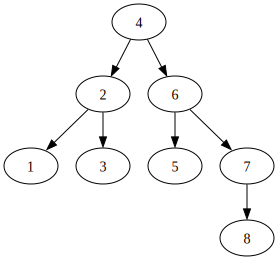

In [1808]:
dot = visualize_tree(test1_tree)

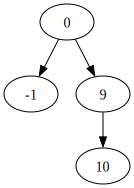

In [1809]:
dot = visualize_tree(test2_tree)

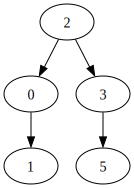

In [1810]:
dot = visualize_tree(test3_tree)

***

### Section 3: Implementing Search, Insert and Delete Operations

Let us implement IDS operations on the BST we have built

Search operation should look like:

In [1811]:
def search(nodes, val):

    if val == nodes.val:
        return True

    if val < nodes.val:
        
        if nodes.left == None:
            return False

        return search(nodes.left, val)

    elif val >= nodes.val:
        
        if nodes.right == None:
            return False

        return search(nodes.right, val)

In [1812]:
search(test3_tree, 3)

True

In [1813]:
search(test1_tree, 18)

False

Let us write insert function now:

In [1814]:
def insert(nodes, val):

    # Empty Tree
    if nodes == None:
        nodes = Node(val)
        return

    # Value already exist on the node
    if nodes.val == val:
        return

    if val < nodes.val:

        if nodes.left == None: 
            nodes.left = Node(val)
            return
        else:
            insert(nodes.left, val)
            return

    elif val >= nodes.val:
        
        if nodes.right == None:
            nodes.right = Node(val)
            return
        else:
            insert(nodes.right, val)
            return

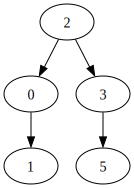

In [1815]:
test3 = [0, 1, 2, 3, 3, 3, 5]
test3 = np.unique(test3)

test3_tree = buildBinaryTree(test3)
dot = visualize_tree(test3_tree)

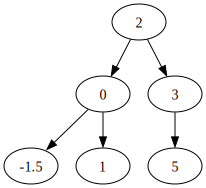

In [1816]:
insert(test3_tree, -1.5)
dot = visualize_tree(test3_tree)

Let us write delete opertion. We will write another function minValueNode as well.

In [1817]:
def minValueNode(node):
    current = node
 
    # loop down to find the leftmost leaf
    while(current.left is not None):
        current = current.left
 
    return current

def delete(nodes, val):

    if nodes == None:  
        return nodes

    if val < nodes.val:
        
        #if nodes.left:
        nodes.left = delete(nodes.left, val)

    elif val > nodes.val:
        
        #if nodes.right:
        nodes.right = delete(nodes.right, val)

    else:
        
        # Node with only one child or no child
        
        if nodes.left is None:
            temp = nodes.right
            nodes = None
            return temp
        elif nodes.right is None:
            temp = nodes.left
            nodes = None
            return temp
        
        # Nodes with two children: Get the inorder successor
        temp = minValueNode(nodes.right)
        
        nodes.val = temp.val
        
        nodes.right = delete(nodes.right, temp.val)
        
    return nodes

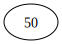

In [1818]:
test3_tree = buildBinaryTree([50])
dot = visualize_tree(test3_tree)

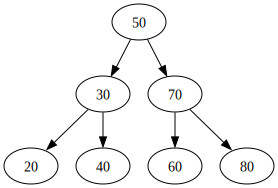

In [1819]:
insert(test3_tree, 50)
insert(test3_tree, 30)
insert(test3_tree, 20)
insert(test3_tree, 40)
insert(test3_tree, 70)
insert(test3_tree, 60)
insert(test3_tree, 80)
dot = visualize_tree(test3_tree)

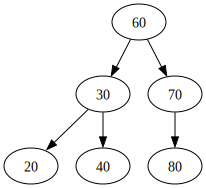

In [1820]:
delete(test3_tree, 50)
dot = visualize_tree(test3_tree)

***

### <font color='red'> Section 4: Now that you have a good understanding of BST, write down code for activities in the onTrack Task sheet, in the following section </font>

In [1821]:
### TODO ###
### Good Luck ###

# Activity 1:
class Node:
    
    def __init__(self, value):

        self.val = value
        self.right = None
        self.left = None
        self.balance = 0
    
    def __eq__(self, __value: object) -> bool:
        if type(__value) == Node:
            return self.val == __value.val
        return False

def set_balances(node: Node, height: int) -> int:
    left_height = 0
    right_height = 0
    
    if node.left != None:
        left_height = set_balances(node.left, height + 1)
    if node.right != None:
        right_height = set_balances(node.right, height + 1)

    node.balance = left_height - right_height
    
    return max(left_height, right_height)


def insert(nodes: Node, val):

    # Empty Tree
    if nodes == None:
        nodes = Node(val)
        return

    # Value already exist on the node
    if nodes.val == val:
        return

    if val < nodes.val:

        if nodes.left == None: 
            nodes.left = Node(val)
            nodes.balance += 1
            return
        else:
            insert(nodes.left, val)
            nodes.balance += 1
            return

    elif val >= nodes.val:
        
        if nodes.right == None:
            nodes.right = Node(val)
            nodes.balance -= 1
            return
        else:
            insert(nodes.right, val)
            nodes.balance -= 1
            return

def delete(nodes: Node, val):

    if nodes == None:  
        return nodes

    if val < nodes.val:
        
        #if nodes.left:
        nodes.left = delete(nodes.left, val)
        nodes.balance -= 1

    elif val > nodes.val:
        
        #if nodes.right:
        nodes.right = delete(nodes.right, val)
        nodes.balance += 1

    else:
        
        # Node with only one child or no child
        
        if nodes.left is None:
            temp = nodes.right
            nodes = None
            return temp
        elif nodes.right is None:
            temp = nodes.left
            nodes = None
            return temp
        
        # Nodes with two children: Get the inorder successor
        temp = minValueNode(nodes.right)
        
        nodes.val = temp.val
        
        nodes.right = delete(nodes.right, temp.val)
        
    return nodes

def buildBinaryTree(nodes):
    
    if len(nodes) == 0:
        raise ValueError('list is empty')
    
    root = binaryTree(nodes, 0, len(nodes) - 1)
    set_balances(root, 1)
        
    return root
        
def binaryTree(nodes, start, end):
    
    if start > end:
        return
    
    middle = (start + end) // 2
    root = Node(nodes[middle])
    root.left = binaryTree(nodes, start, middle - 1)
    root.right = binaryTree(nodes, middle + 1, end)
    
    return root

def is_balanced(nodes: Node) -> bool:
    if not nodes.balance in [-1,0,1]:
        return False
    
    left_balanced = True
    right_balanced = True

    if nodes.left != None:
        left_balanced = is_balanced(nodes.left)
    if nodes.right != None:
        right_balanced = is_balanced(nodes.right)
    
    return min(left_balanced, right_balanced)

In [1822]:
# Activity 2:

def first_common_ancestor(tree: Node, node1: Node, node2: Node) -> Node:
    if not (search(tree, node1.val) and search(tree, node2.val)):
        raise ValueError('The nodes are not in the same tree')

    min_val = node1.val if node1.val < node2.val else node2.val
    max_val = node1.val if node1.val > node2.val else node2.val

    # shift right while the root of the sub tree is smaller than both values
    while tree.val < min_val:
        tree = tree.right
    
    # shift left while the root of the sub tree is bigger than both values
    while tree.val > max_val:
        tree = tree.left
    
    return tree

In [1823]:
# Activity 3:

def left_rotation(tree: Node, node: Node) -> Node:
    root = node.right
    node.right = root.left
    root.left = node

    node.balance = node.balance + 1 - min(0, root.balance)
    root.balance = root.balance + 1 + max(0, node.balance)

    if tree == node:
        tree = root

    return root

def right_rotation(tree: Node, node: Node) -> Node:
    root = node.left
    node.left = root.right
    root.right = node

    node.balance = node.balance - 1 - max(0, root.balance)
    root.balance = root.balance - 1 + min(0, node.balance)

    if tree == node:
        tree = root

    return root

def left_right_rotation(tree: Node, node: Node) -> Node:
    node.left = left_rotation(tree, node.left)
    return right_rotation(tree, node)

def right_left_rotation(tree: Node, node: Node) -> Node:
    node.right = right_rotation(tree, node.right)
    return left_rotation(tree, node)


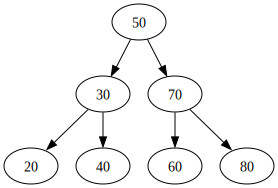

Test 1: Passed
Test 2: Passed
Test 3: Passed
Test 4: Not Implemented
Test 5: Passed
Test 6: Passed
Test 7: Passed
Test 8: Passed
Test 9: Passed


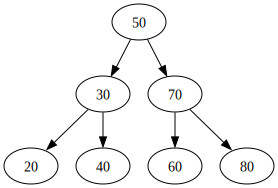

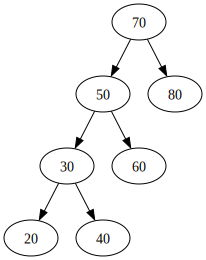

Test 10: Pass
*Yeah just compare the visualisations


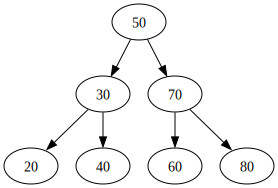

Test 11: Pass
*Yeah just compare the visualisations


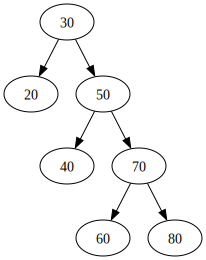

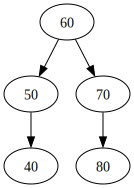

Test 10: Pass
*Yeah just compare the visualisations


In [1824]:
def tree_to_dict(tree: Node) -> list[Node]:
    nodes = {tree.val : tree.balance}
    if tree.left != None:
        nodes.update(tree_to_dict(tree.left))
    if tree.right != None:
        nodes.update(tree_to_dict(tree.right))
    return nodes

def print_balances(nodes: dict):
    for node, balance in tree.items():
        print('{}: {}'.format(node,balance))

# Tests
if __name__ == '__main__':
    test_tree = buildBinaryTree([50])
    insert(test_tree, 50)
    insert(test_tree, 30)
    insert(test_tree, 20)
    insert(test_tree, 40)
    insert(test_tree, 70)
    insert(test_tree, 60)
    insert(test_tree, 80)
    dot = visualize_tree(test_tree)

    # test 1 - perfectly balanced tree with correct balance values
    tree = tree_to_dict(test_tree)
    unbalanced_nodes = [node for node, balance in tree.items() if balance != 0]
    
    if len(unbalanced_nodes) != 0:
        raise ValueError('The nodes do not have the correct balance value')
    else:
        print('Test 1: Passed')
    
    # test 2 - unbalanced node 30 by deletion:
    delete(test_tree, 40)

    tree = tree_to_dict(test_tree)
    unbalanced_nodes = [node for node, balance in tree.items() if balance != 0]

    if len(unbalanced_nodes) != 2:
        raise ValueError('Incorrect number of inbalanced nodes')
    else:
        if not (30 in unbalanced_nodes and 50 in unbalanced_nodes):
            raise ValueError('The incorrect nodes have inbalanced balance values')
        if tree[30] != 1 and tree[50] != 1:
            raise ValueError('The balance values are wrong')
        print('Test 2: Passed')
    
    # test 3 - unbalance nodes 70, 60, 50 and 59 by insertion and rebalance 30
    insert(test_tree, 59)
    insert(test_tree, 58)
    insert(test_tree, 40)

    tree = tree_to_dict(test_tree)
    unbalanced_nodes = [node for node, balance in tree.items() if balance != 0]

    if len(unbalanced_nodes) != 4:
        raise ValueError('Nodes 50, 70, 60 and 59 should be the only unbalanced nodes')
    else:
        if not (all(node in unbalanced_nodes for node in [50,70,60,59])):
            raise ValueError('Incorrect nodes inbalanced')
        elif not [tree[50],tree[60],tree[60],tree[59]] == [-2,2,2,1]:
            raise ValueError('Balance values are incorrect')
        print('Test 3: Passed')
    
    # test 4 - check that this all still works when deleting the root
    # too lazy to actually implement this - if it did not work it would be due to the delete function messing up with deleting the root
    print('Test 4: Not Implemented')

    # test 5 - check tree is balanced : should return False
    balanced = is_balanced(test_tree)
    if balanced == True:
        raise ValueError('The tree is not balanced but is_balanced returned True')
    else:
        print('Test 5: Passed')
    
    # test 6 - balance tree and then check if true return from is_balanced
    delete(test_tree, 58)
    delete(test_tree, 59)
    
    balanced = is_balanced(test_tree)
    if not balanced:
        raise ValueError('The tree is balanced but is_balanced return False')
    else:
        print('Test 6: Passed')

    # test 7 - check that the first common ancestor is found
    result = first_common_ancestor(test_tree, Node(20), Node(40))
    if result.val != 30:
        raise ValueError('The wrong node was returned')
    else:
        print('Test 7: Passed')
    
    # test 8 - ...
    insert(test_tree, 59)
    insert(test_tree, 58)

    result = first_common_ancestor(test_tree, Node(58), Node(80))
    if result.val != 70:
        raise ValueError('The wrong node was returned')
    else:
        print('Test 8: Passed')
    
    # test 9 - using the root as an input
    result = first_common_ancestor(test_tree, Node(50), Node(80))
    if result.val != 50:
        raise ValueError('The wrong node was returned')
    else:
        print('Test 9: Passed')
    
    # test 10 - test left rotation
    delete(test_tree, 58)
    delete(test_tree, 59)
    visualize_tree(test_tree)
    test_tree = left_rotation(test_tree, test_tree)
    visualize_tree(test_tree)
    print('Test 10: Pass\n*Yeah just compare the visualisations')

    # test 11 - test right rotation
    test_tree = right_rotation(test_tree, test_tree)
    visualize_tree(test_tree)
    print('Test 11: Pass\n*Yeah just compare the visualisations')

    # test 12 - test right-left rotation
    test_tree = right_rotation(test_tree, test_tree)
    visualize_tree(test_tree)
    test_tree = right_left_rotation(test_tree, test_tree.right)
    visualize_tree(test_tree)
    print('Test 12: Pass\n*Yeah just compare the visualisations')



***